In [110]:
import pandas as pd
train=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\house-prices-advanced-regression-techniques\\train.csv")
test=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\house-prices-advanced-regression-techniques\\test.csv")


display(train.head(), test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [111]:
train_numeric=train.select_dtypes(include =['int64','float64']).columns
train_numeric=train_numeric[:-1]
train_numeric

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [112]:
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [113]:
null_columns=train.isnull().sum()[train.isnull().sum() > 0].index
null_columns_test=test.isnull().sum()[test.isnull().sum() > 0].index

In [114]:
print(train[null_columns].dtypes)

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [115]:
# 결측값이 있는 열 중 object 타입 열만 필터링
object_null_columns = train[null_columns].select_dtypes(include='object').columns
object_null_columns_test = test[null_columns_test].select_dtypes(include='object').columns
# 선택된 열에 대해 결측값을 "null"로 채우기
train[object_null_columns] = train[object_null_columns].fillna("null")
test[object_null_columns_test] = test[object_null_columns_test].fillna("null")

print(train.isnull().sum()[train.isnull().sum() > 0])
print(test.isnull().sum()[test.isnull().sum() > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [116]:
numeric_null_columns=train.isnull().sum()[train.isnull().sum() > 0].index
train[numeric_null_columns] = train[numeric_null_columns].fillna(train[numeric_null_columns].median())

print(train.isnull().sum()[train.isnull().sum() > 0])

Series([], dtype: int64)


In [117]:
numeric_null_columns_test=test.isnull().sum()[test.isnull().sum() > 0].index

In [118]:
test[numeric_null_columns_test] = test[numeric_null_columns_test].fillna(test[numeric_null_columns_test].median())

In [119]:
train_object=train.select_dtypes(include='object').columns
test_object=test.select_dtypes(include='object').columns

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train[train_object] = train[train_object].apply(le.fit_transform)
test[test_object] = test[test_object].apply(le.fit_transform)

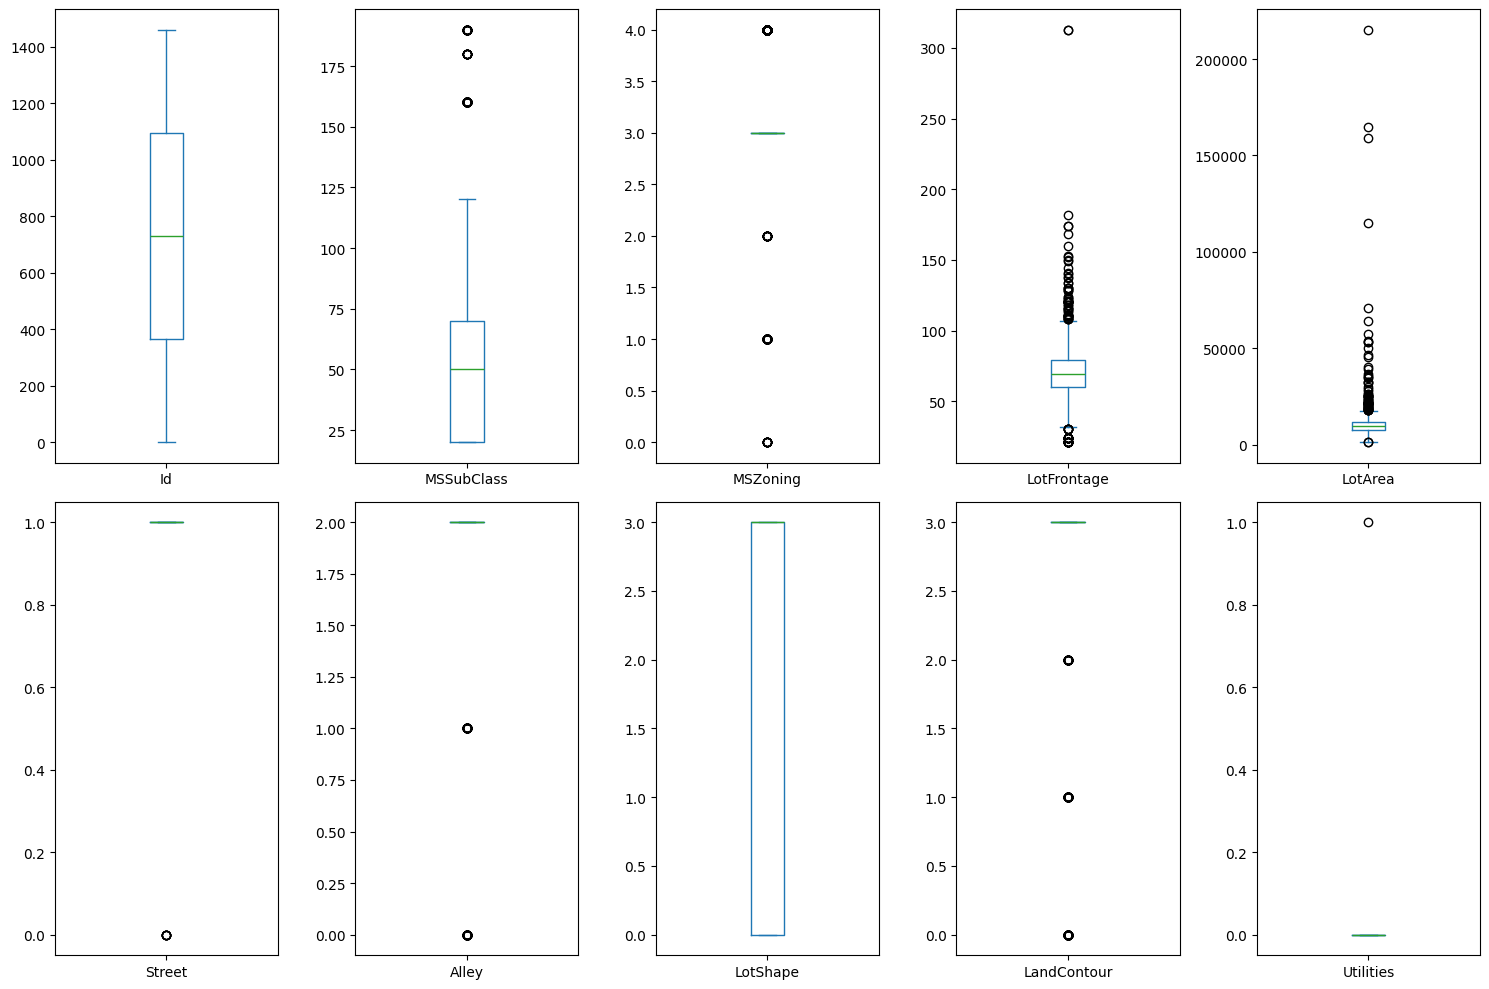

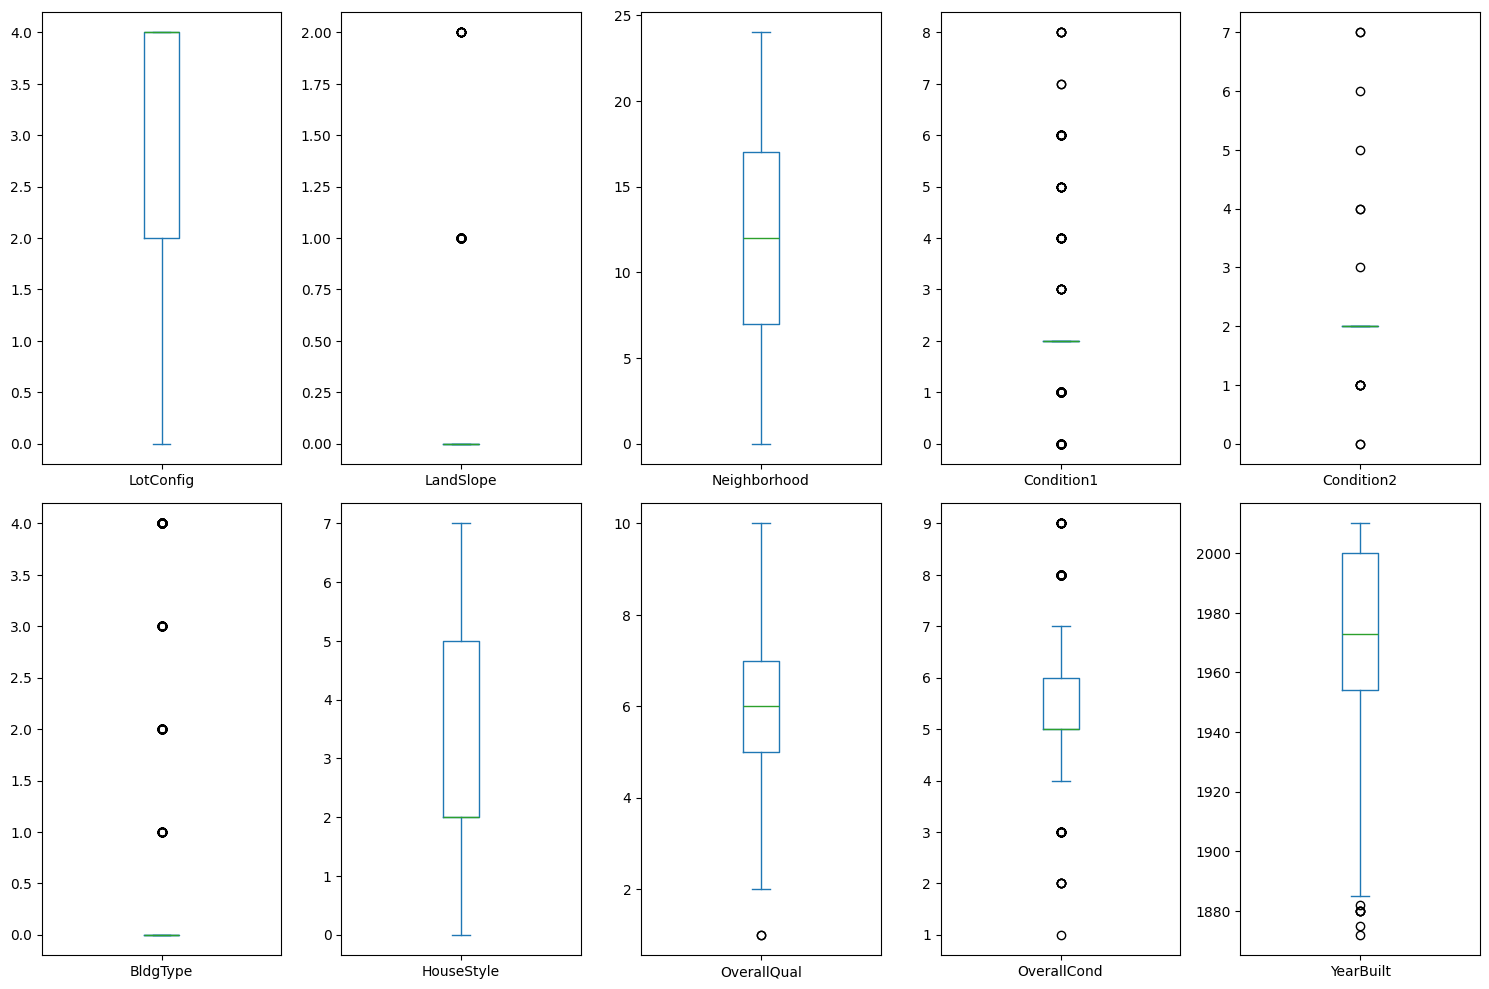

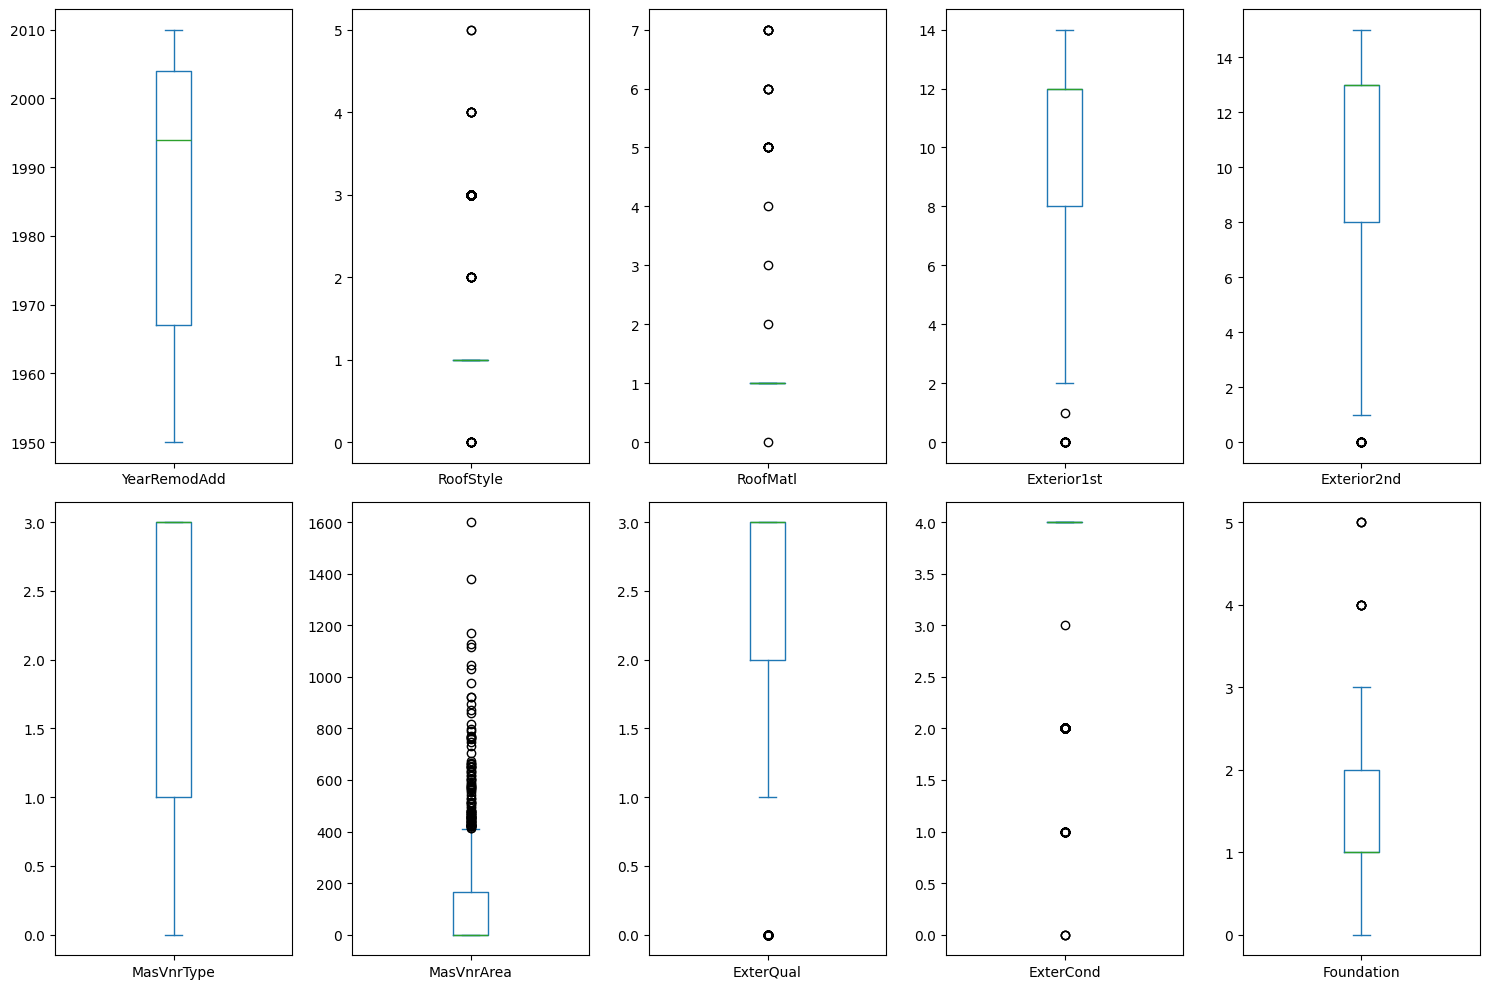

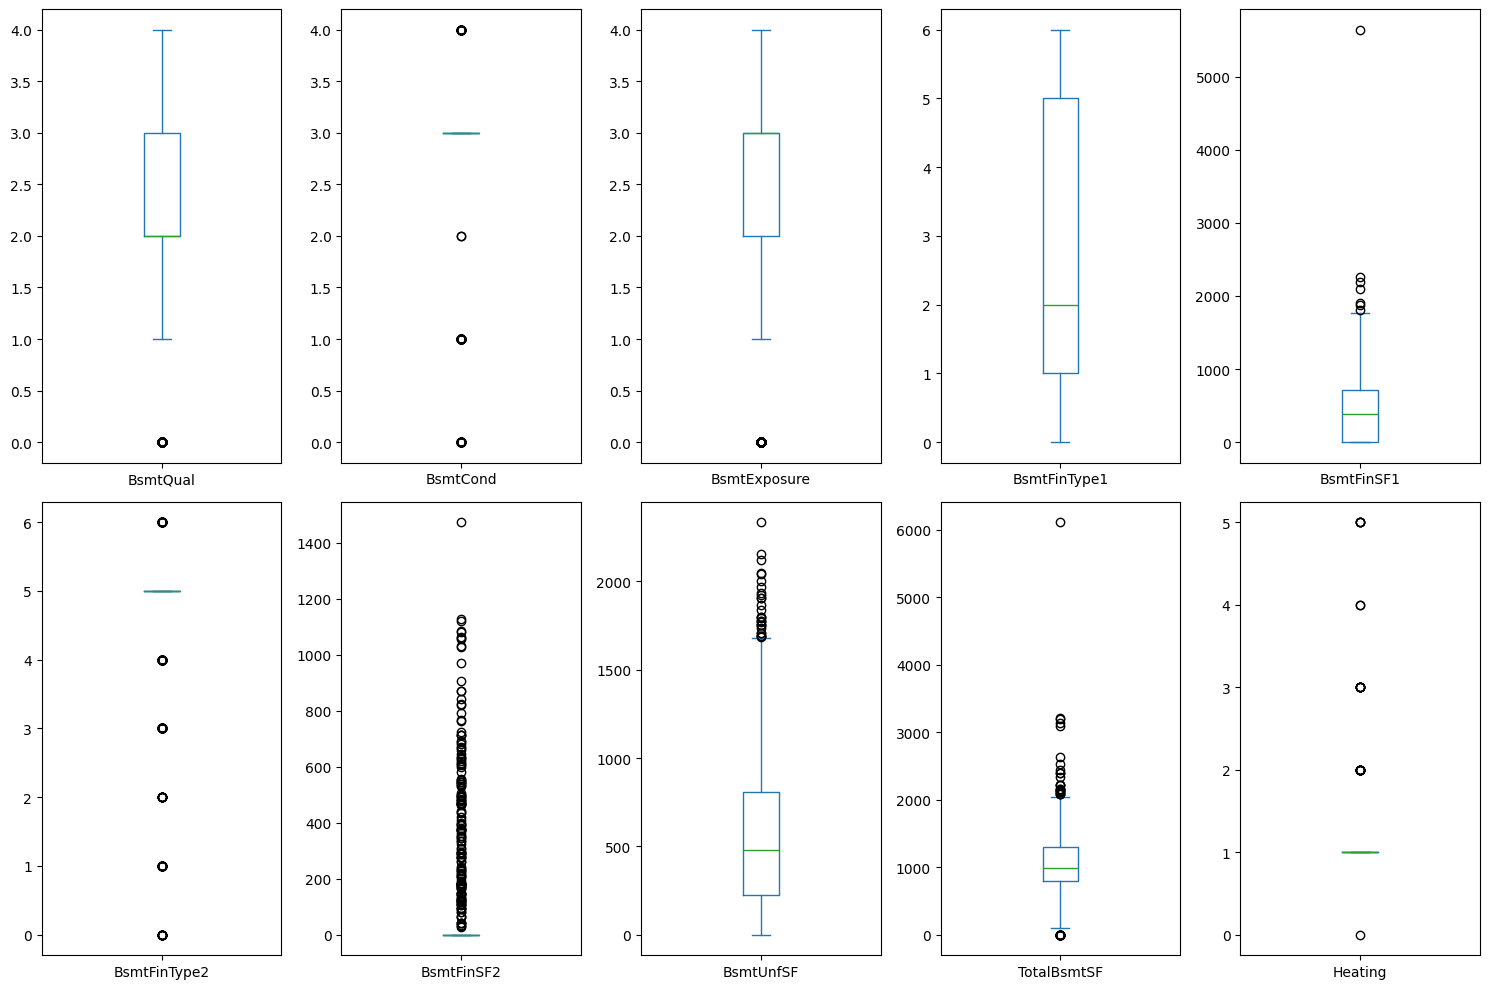

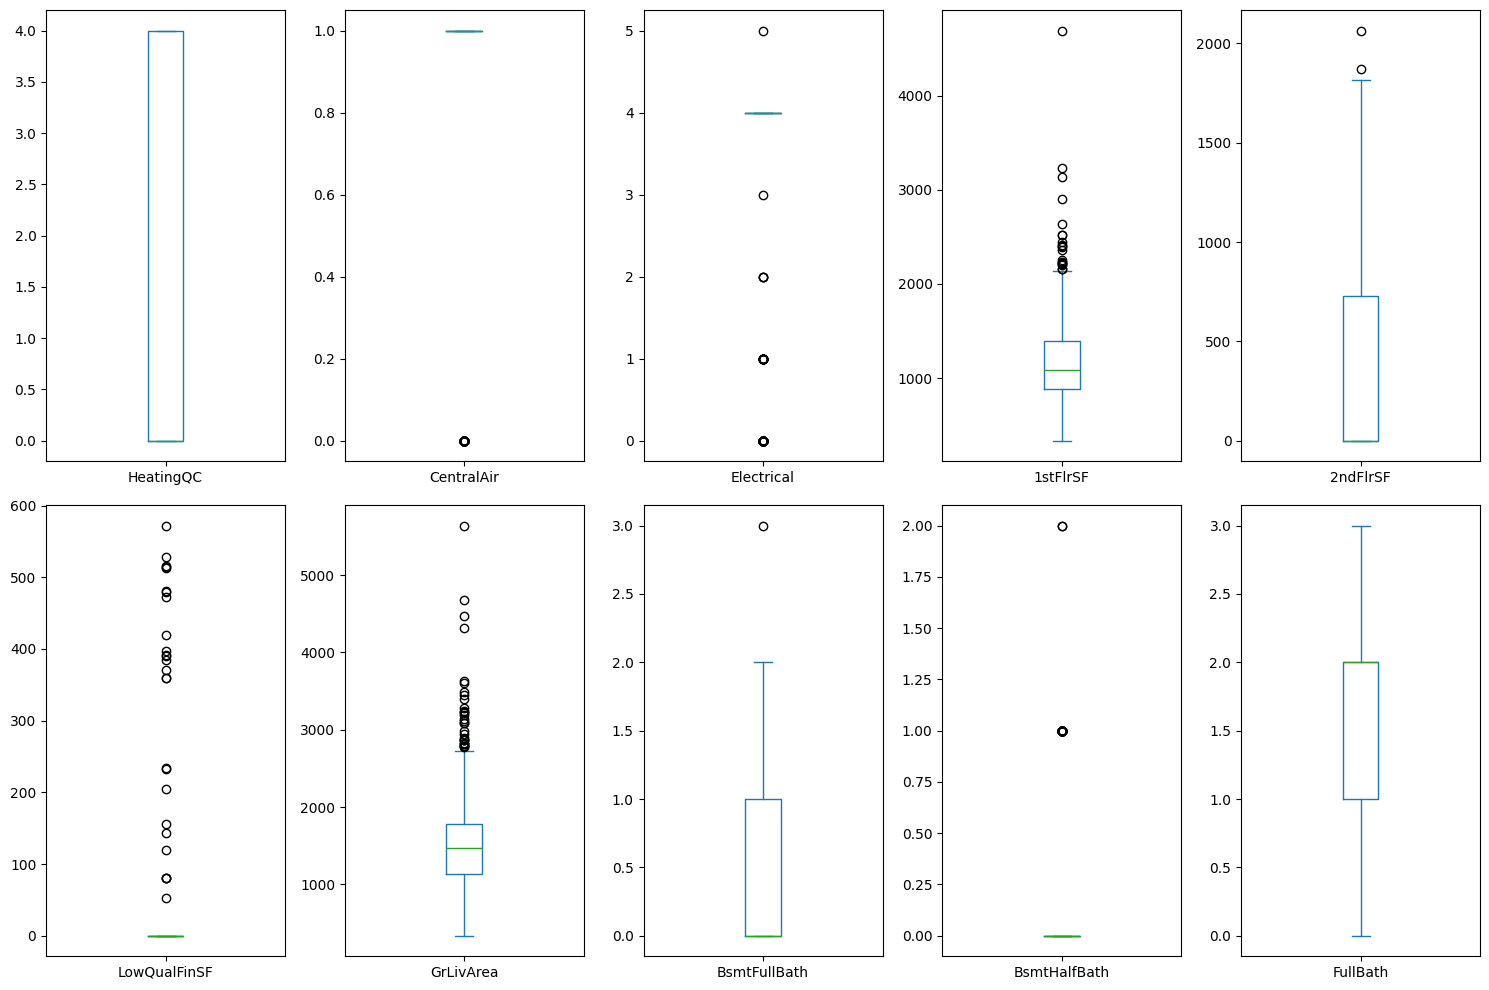

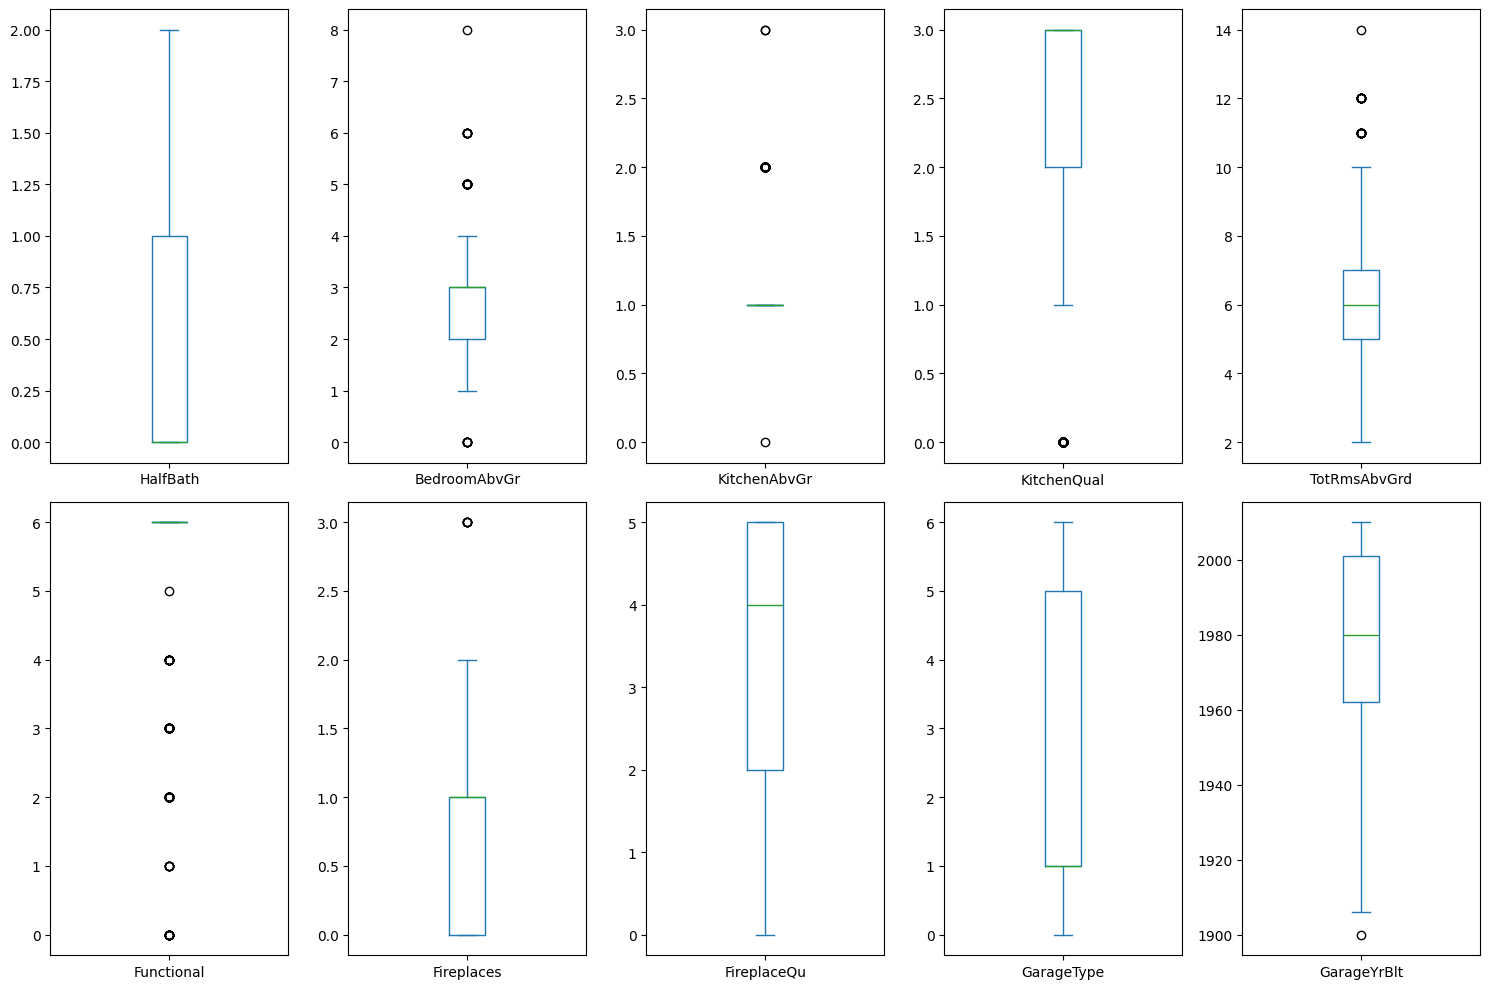

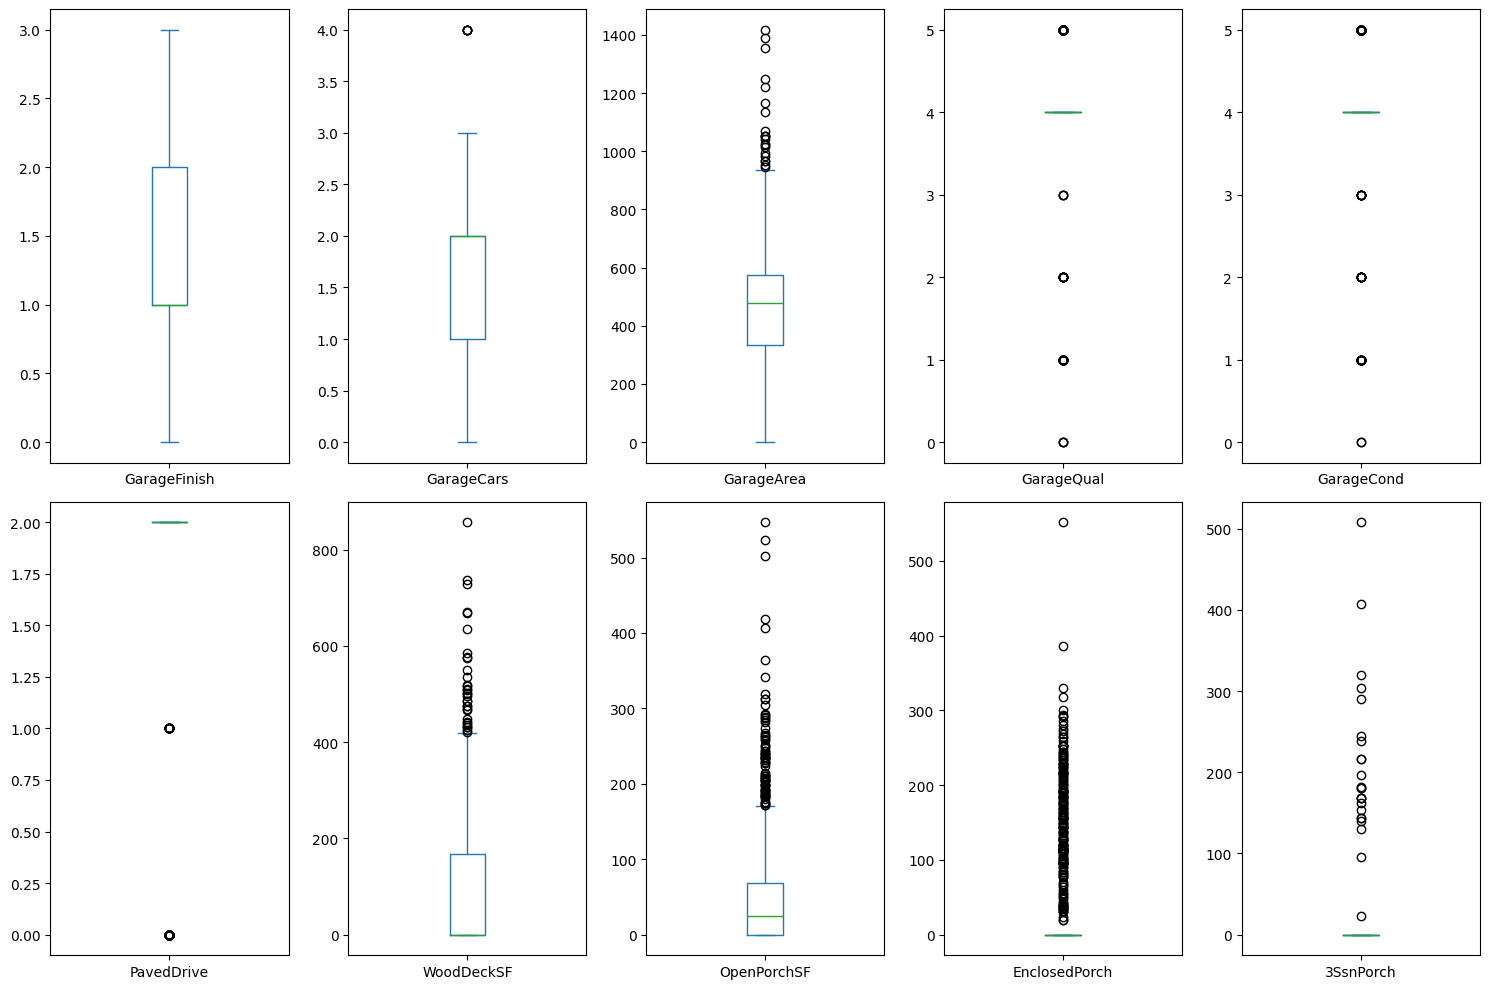

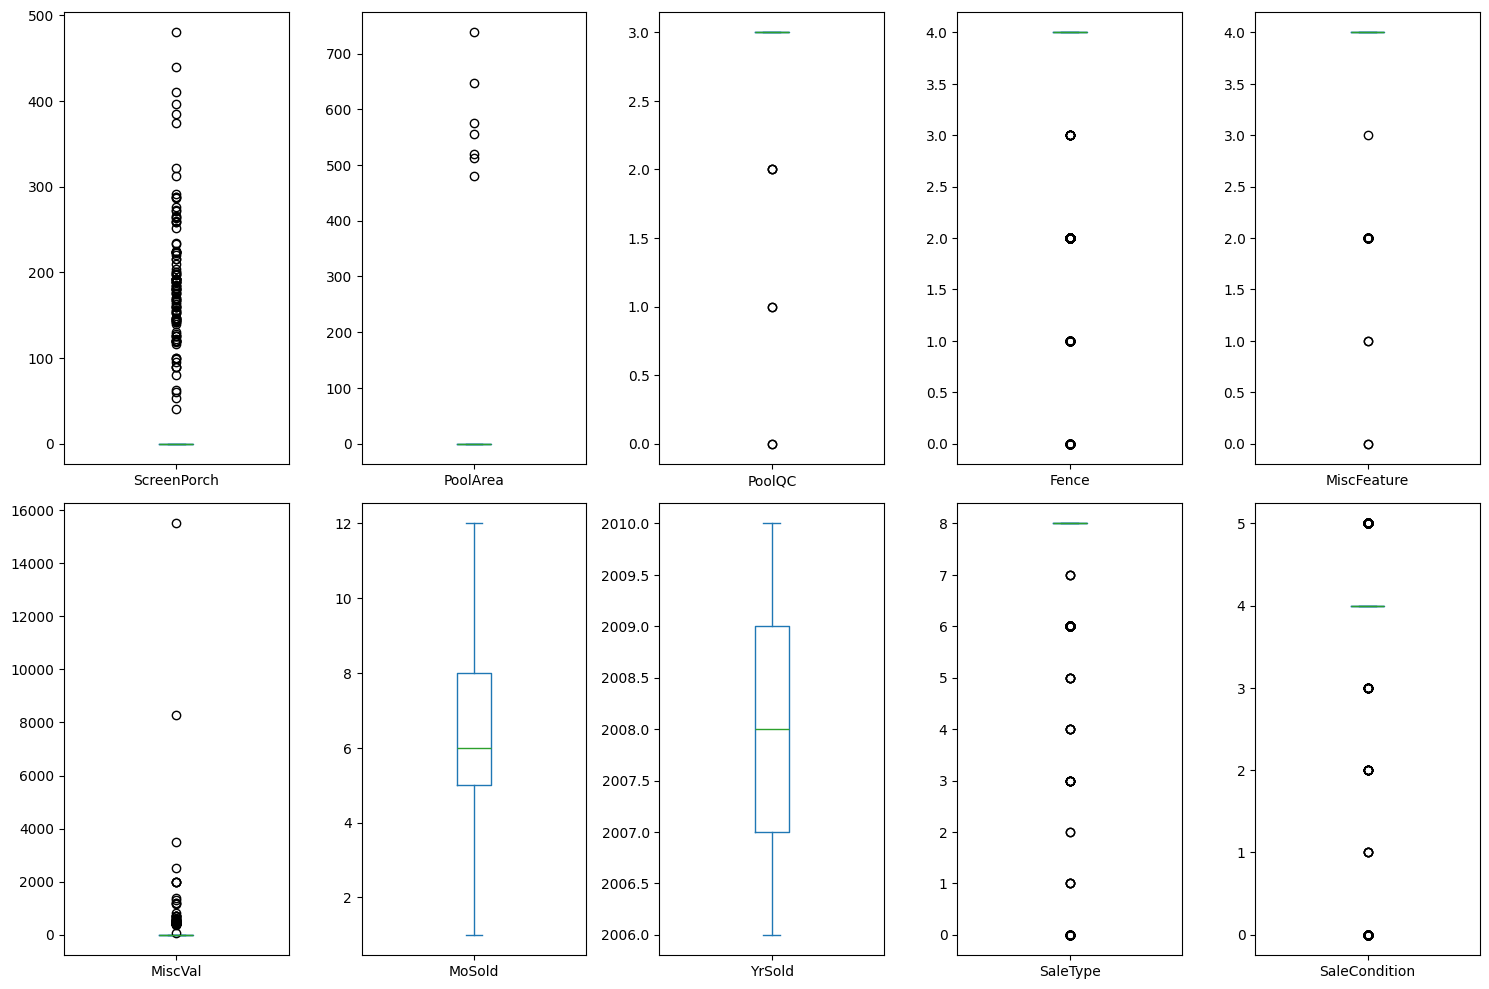

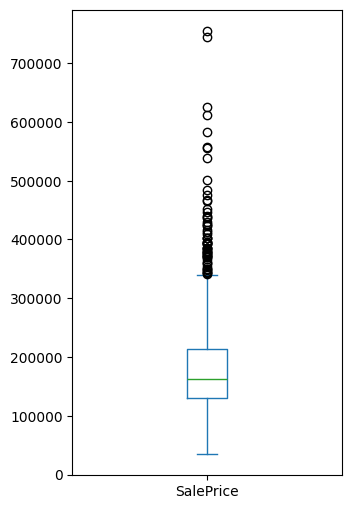

In [121]:
import matplotlib.pyplot as plt

# 열을 10개씩 묶어 그리기
columns_per_plot = 10
for i in range(0, len(train.columns), columns_per_plot):
    subset = train.columns[i:i + columns_per_plot]
    
    # 각 subset에 대해 박스플롯 그리기
    train[subset].plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 10), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()


In [122]:
for i in train_numeric:
    q1 = train[i].quantile(0.25)
    q3 = train[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    #upper_bound보다 큰 값을 가진 행은 upper_bound로 대체
    train.loc[train[i] > upper_bound, i] = upper_bound

#    train[col] = train[col].apply(
#        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
#    )

C:\Users\kmo82\AppData\Local\Temp\ipykernel_10372\2394964188.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2189.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train[i] > upper_bound, i] = upper_bound
C:\Users\kmo82\AppData\Local\Temp\ipykernel_10372\2394964188.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17673.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train[i] > upper_bound, i] = upper_bound
C:\Users\kmo82\AppData\Local\Temp\ipykernel_10372\2394964188.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train[i] > 

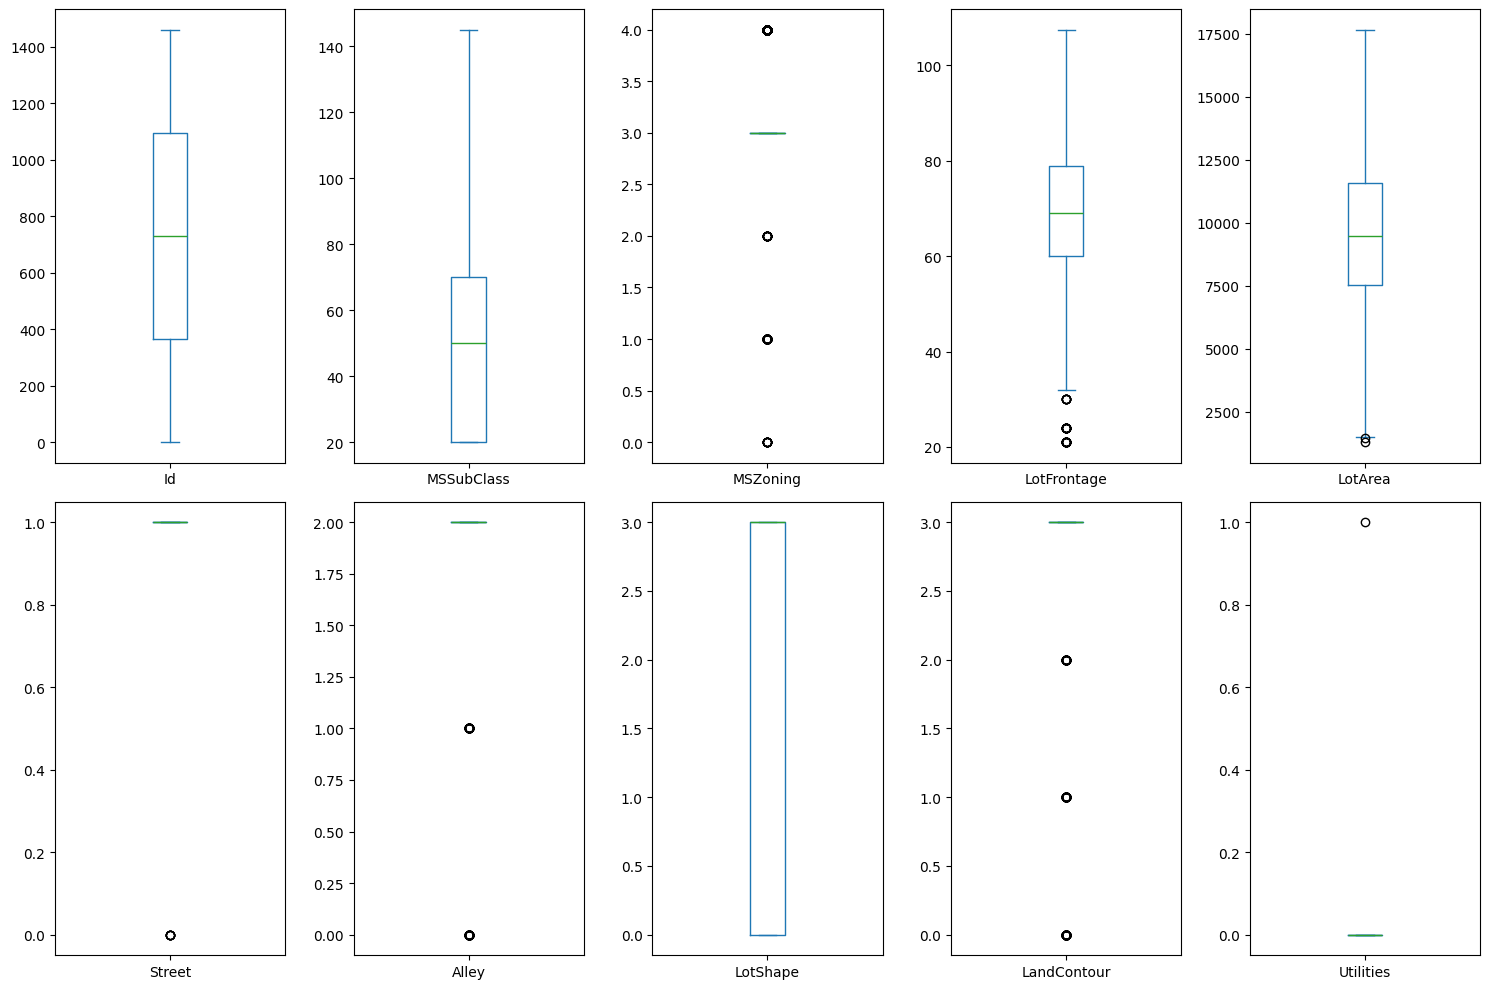

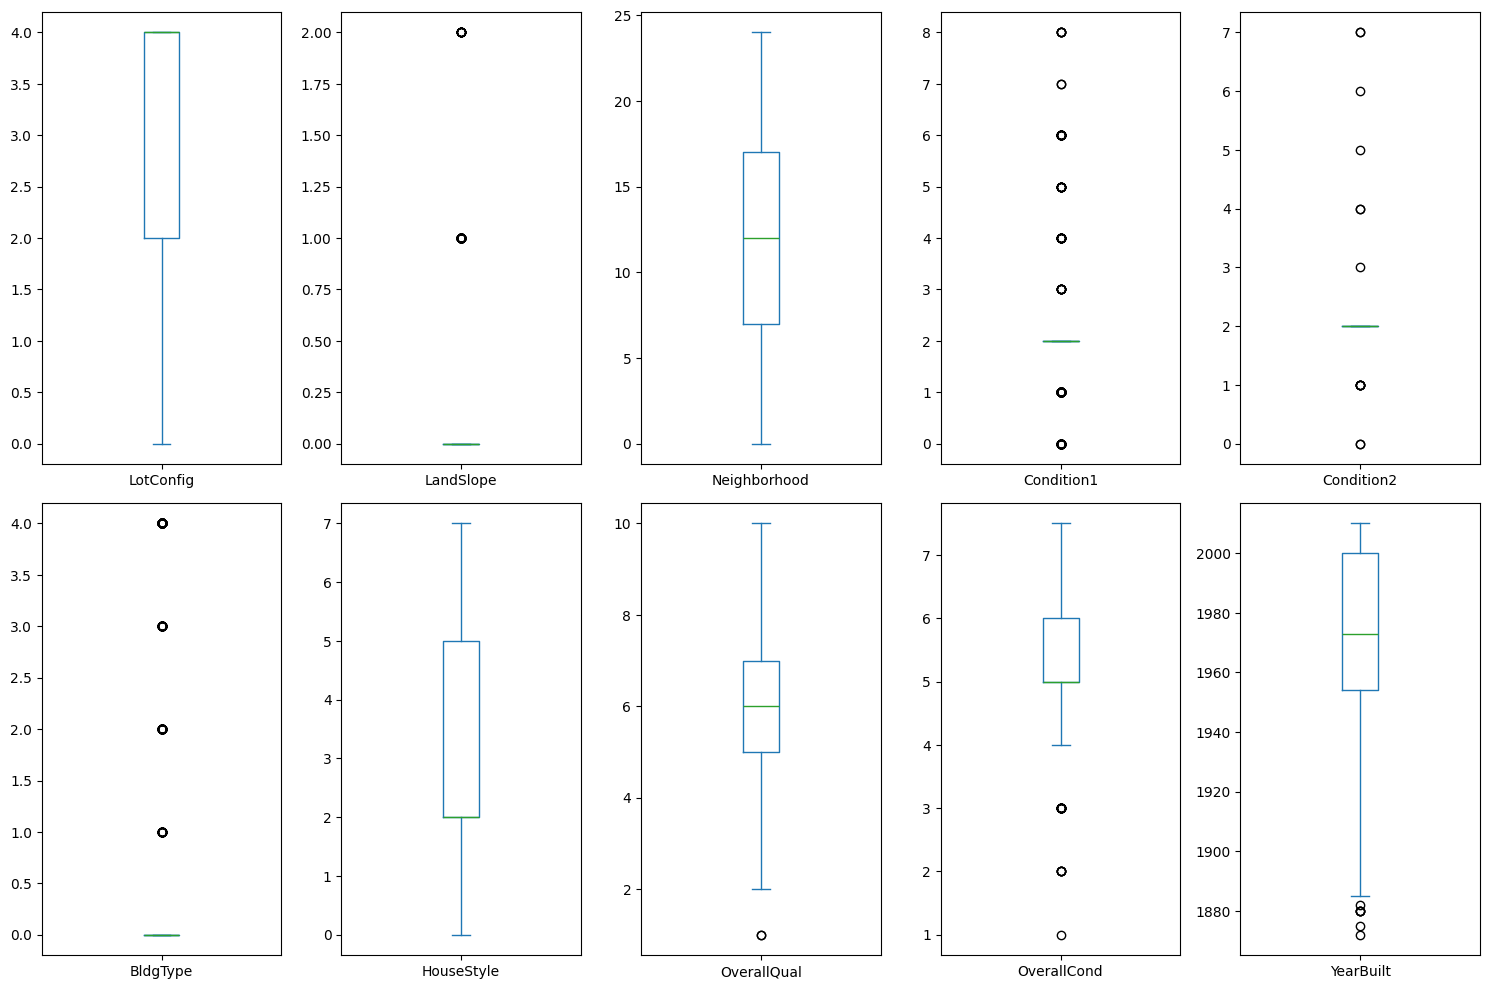

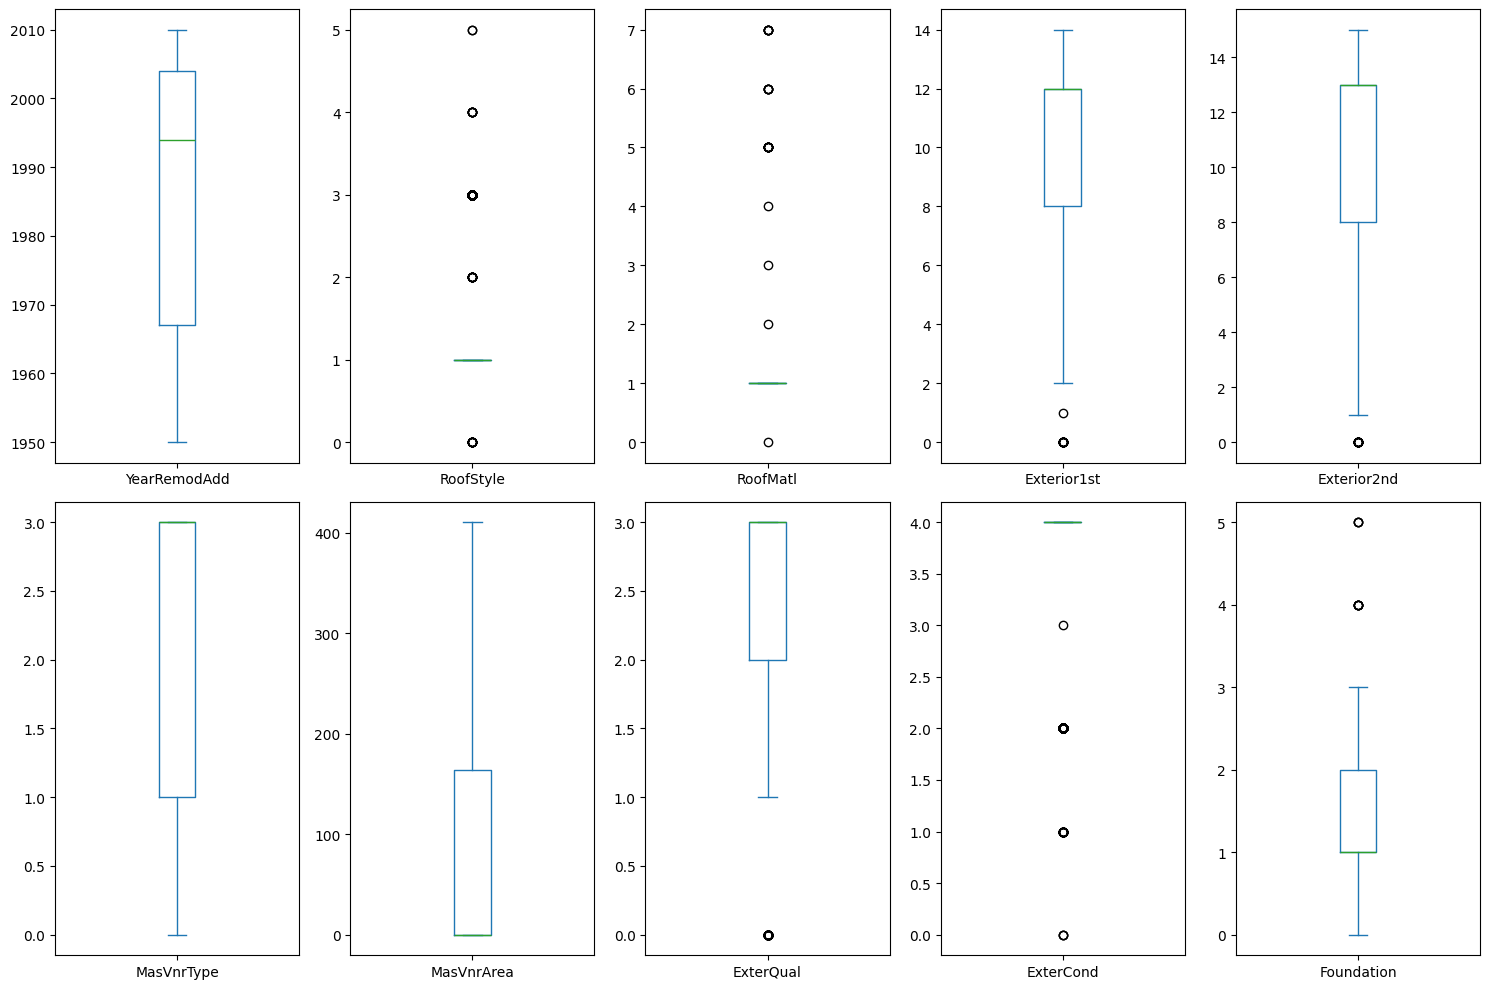

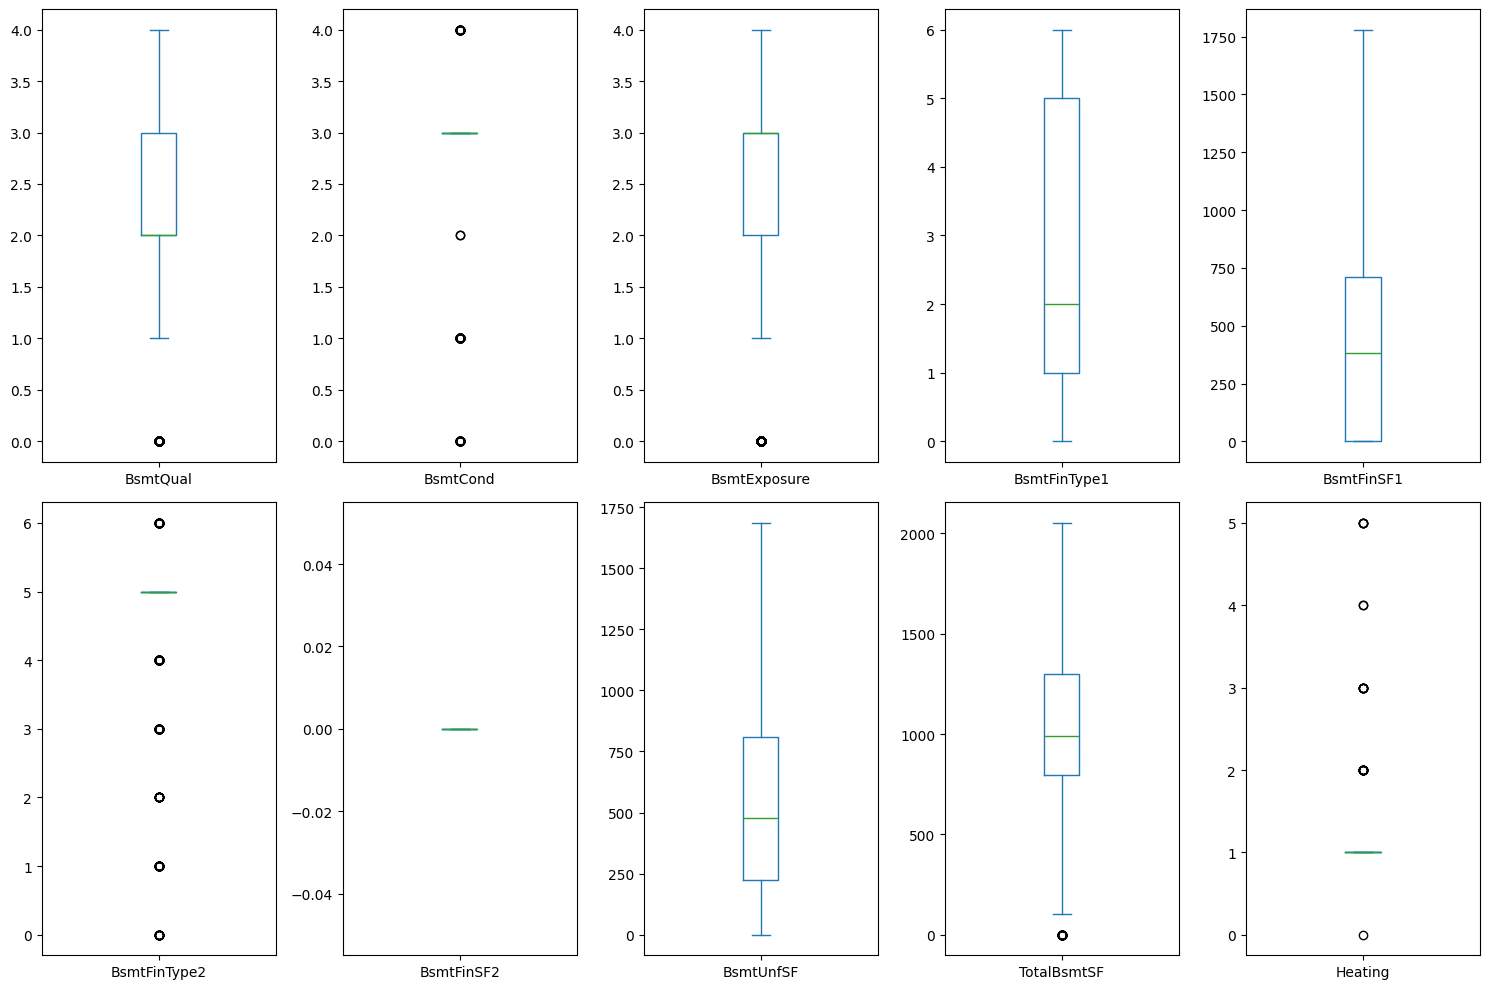

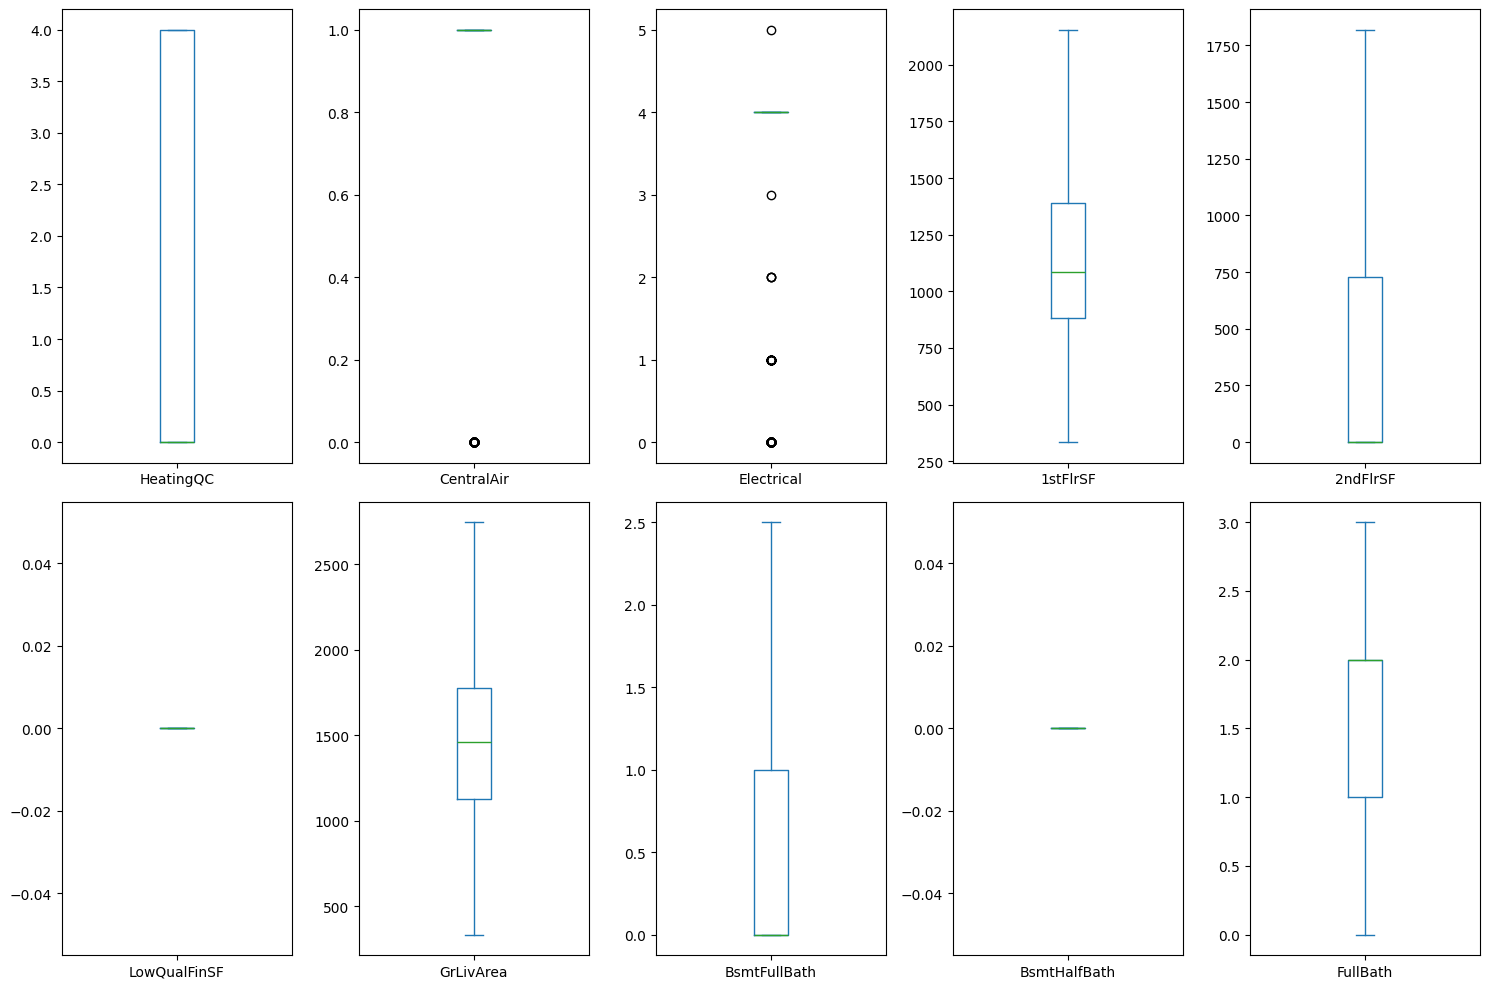

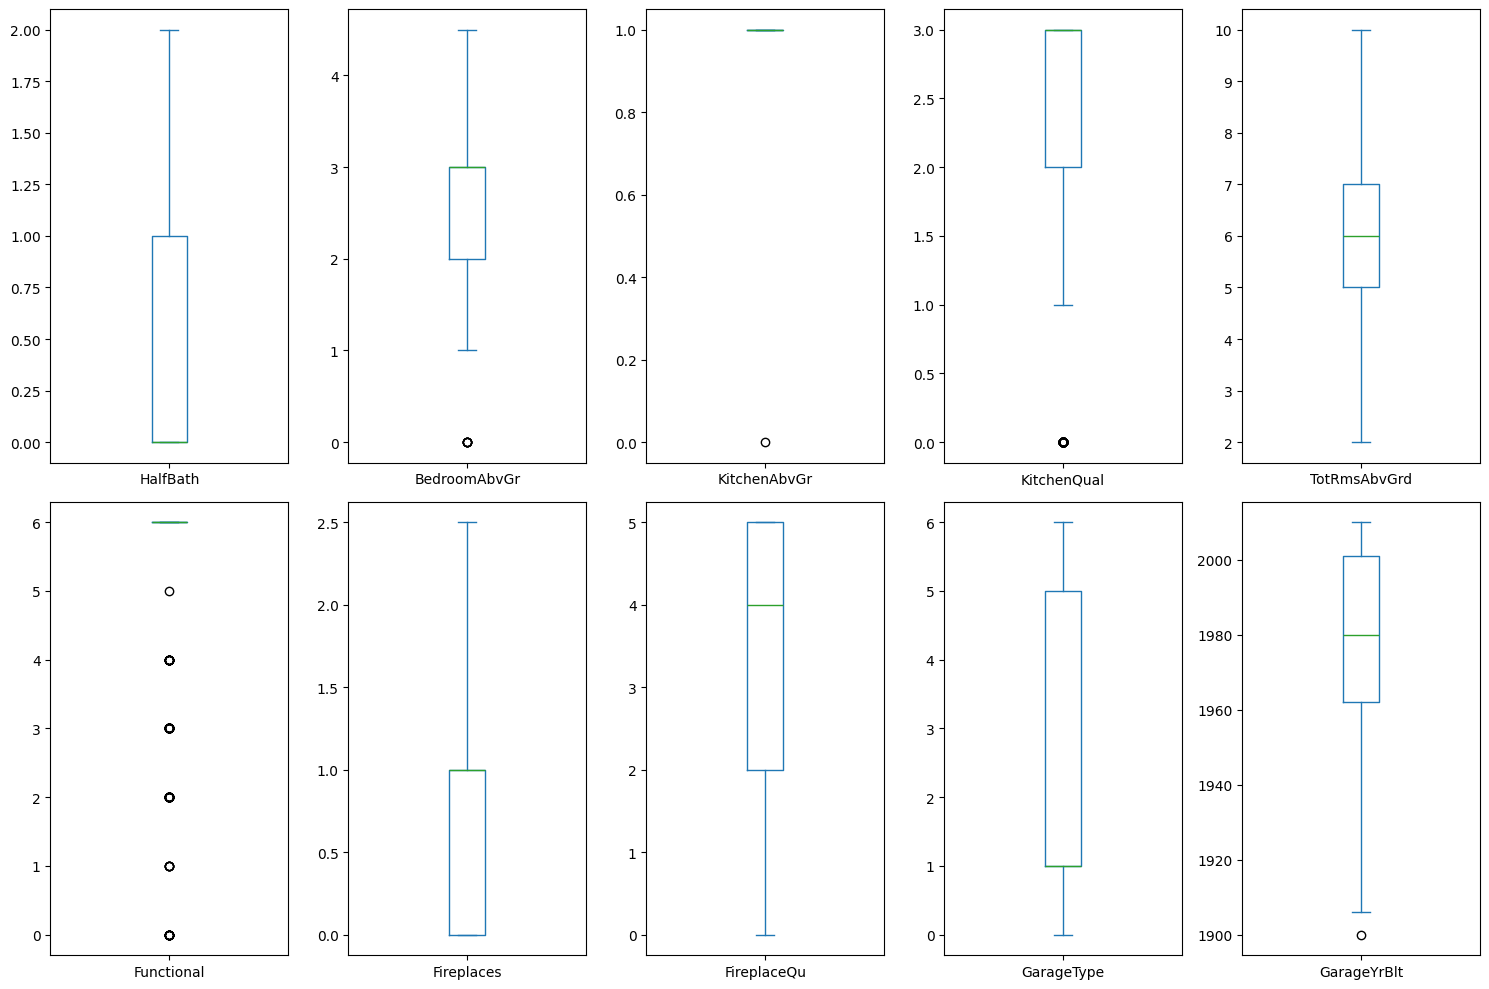

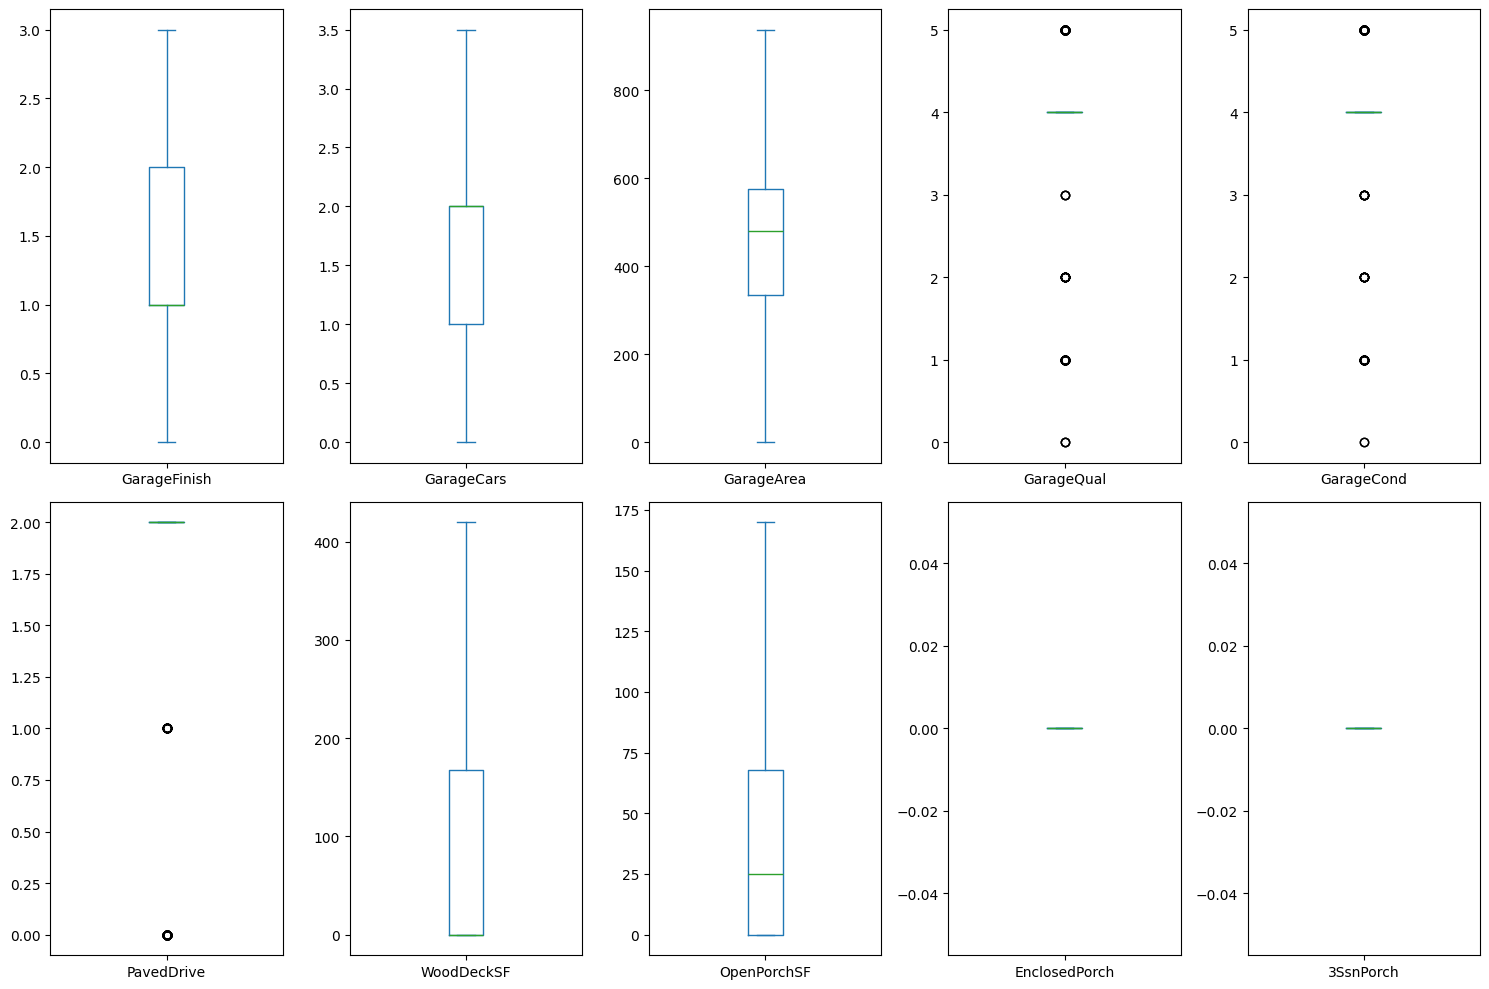

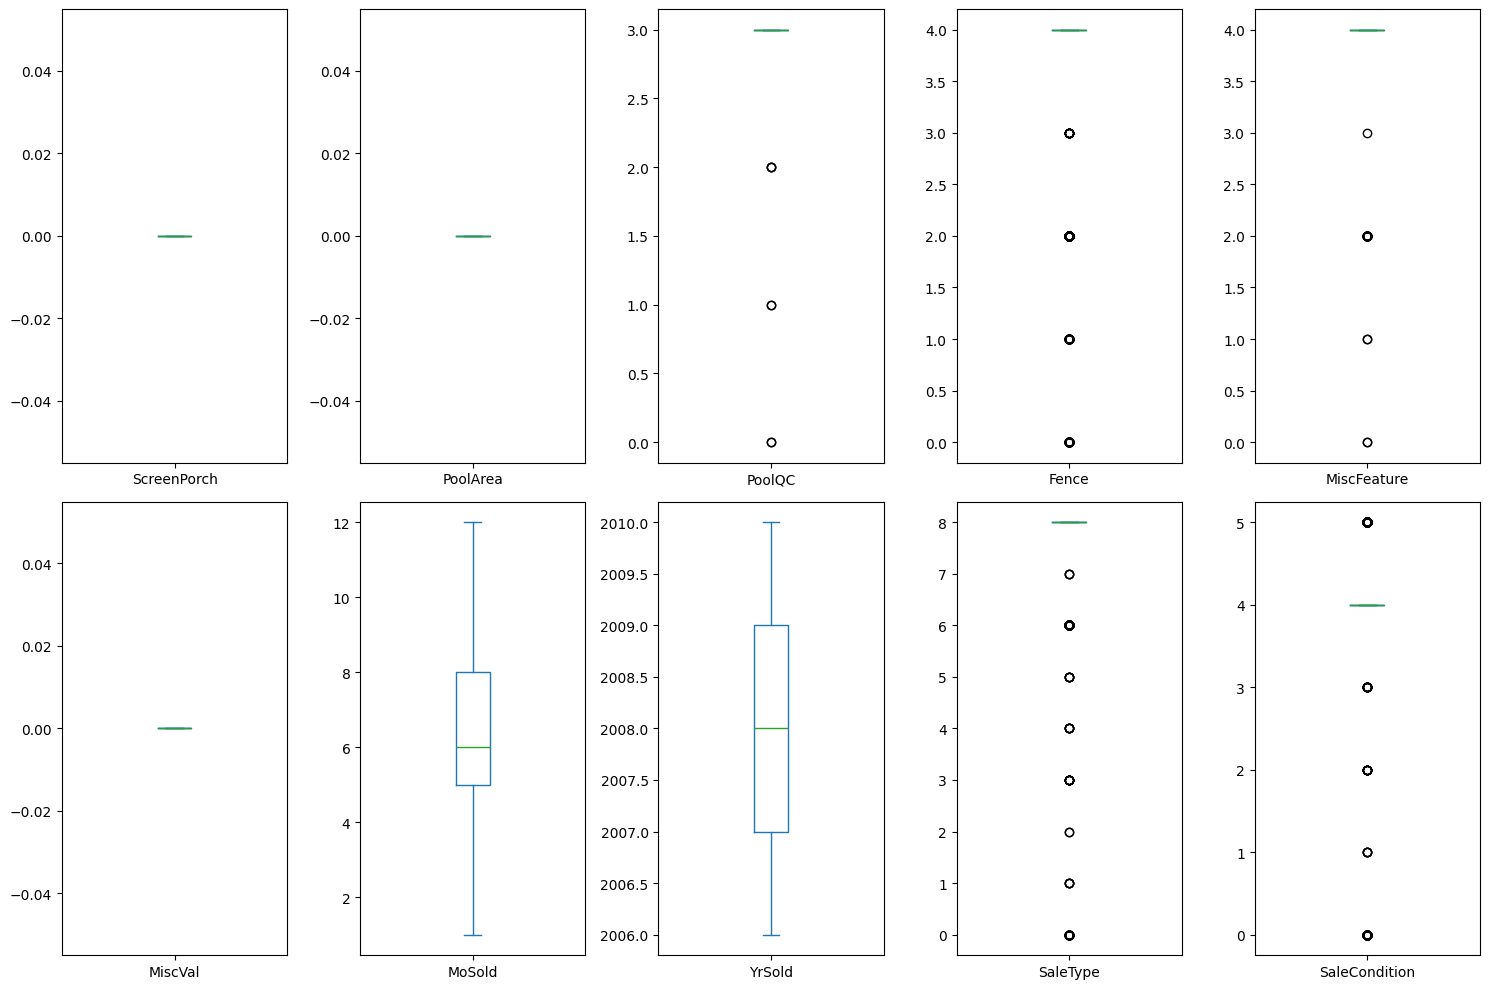

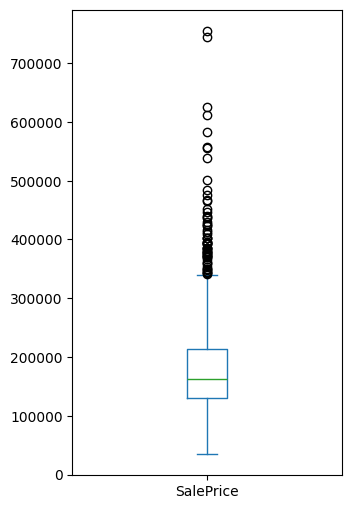

In [123]:
columns_per_plot = 10
for i in range(0, len(train.columns), columns_per_plot):
    subset = train.columns[i:i + columns_per_plot]
    
    # 각 subset에 대해 박스플롯 그리기
    train[subset].plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 10), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

In [124]:
train=train.drop('Id', axis=1)
test=test.drop('Id', axis=1)

In [125]:
train2=train.drop('SalePrice', axis=1)

In [126]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(train2, np.log(train['SalePrice']))

RandomForestRegressor(n_jobs=-1)

In [127]:
result = rf.predict(test)

In [128]:
result

array([11.72041221, 11.94714117, 12.09100134, ..., 11.96817982,
       11.67119631, 12.3358795 ])

In [129]:
sub=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\house-prices-advanced-regression-techniques\\sample_submission.csv")

sub['SalePrice'] = np.exp(result)
sub.to_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\house-prices-advanced-regression-techniques\\submission.csv", index=False)

In [130]:
pd.Series(rf.feature_importances_, index=train2.columns).sort_values(ascending=False) # 중요도 확인

OverallQual      0.545593
GrLivArea        0.110543
TotalBsmtSF      0.047682
GarageCars       0.041744
GarageArea       0.024237
                   ...   
EnclosedPorch    0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
MiscVal          0.000000
Length: 79, dtype: float64

C:\Users\kmo82\AppData\Local\Temp\ipykernel_10372\1785873548.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


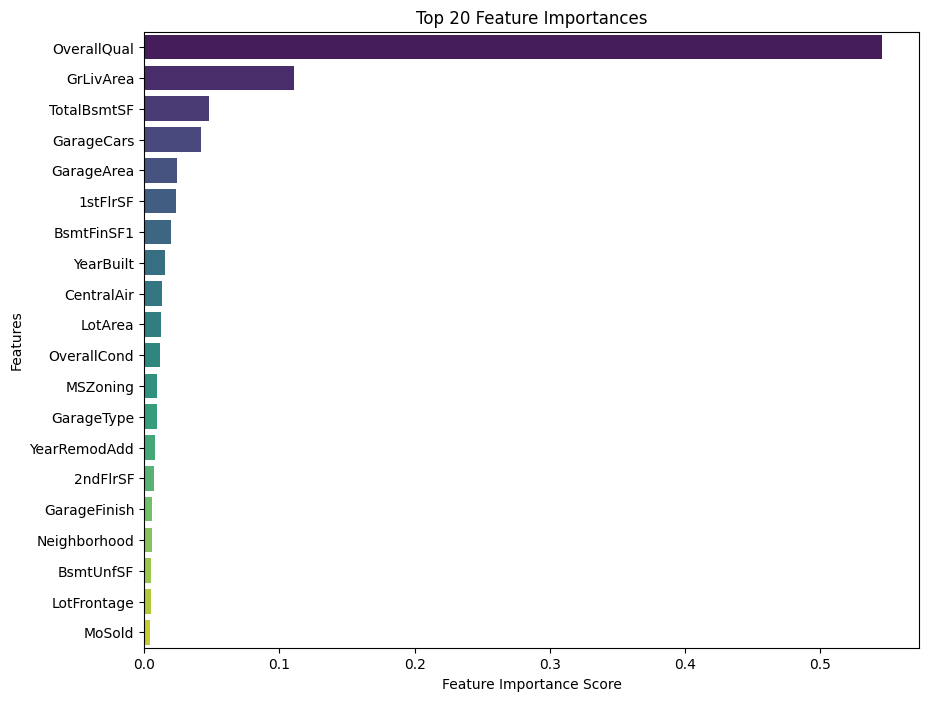

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# feature importance를 시리즈로 만들고 내림차순 정렬
feature_importances = pd.Series(rf.feature_importances_, index=train2.columns).sort_values(ascending=False)

# 상위 20개의 중요 피처만 선택
top_features = feature_importances.head(20)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 20 Feature Importances")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()